In [1]:
%load_ext autoreload
%autoreload 2

import scipy
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
import sir_model
import json
from random import randint

In [2]:
# initialize recording of parameter choices and true/false


# USER: set bounds
beta_search_bounds = [0.08,0.1]
gamma_search_bounds = [0.02,0.03]

In [3]:
# USER: list how many points for each parameter you'd like to synthesize

beta_values_to_synthesize = 10
gamma_values_to_synthesize = 10

In [4]:
search_points_beta = np.linspace(beta_search_bounds[0], beta_search_bounds[1], beta_values_to_synthesize)
search_points_gamma = np.linspace(gamma_search_bounds[0], gamma_search_bounds[1], gamma_values_to_synthesize)

In [6]:
alpha_val = 0.57
# beta_val = 0.011
delta_val = 0.011
# gamma_val = 0.456

epsilon_val = 0.05 #0.171
theta_val = 0.371

zeta_val = 0.125
eta_val = 0.125

mu_val = 0.017
nu_val = 0.027
lamb_val = 0.034
rho_val = 0.034

kappa_val = 0.017
xi_val = 0.017
sigma_val = 0.017

tau_val = 0.01

In [9]:

# set parameters
def ps(param_synth_method):
    param_choices_true_false = []
    for i in range(len(search_points_beta)):
        beta_val = search_points_beta[i]
        for j in range(len(search_points_gamma)):
            gamma_val = search_points_gamma[j]

            # parameters
            # set parameter values
            def alpha(t): return np.piecewise(t, [t>=0], [alpha_val])
            def beta(t): return np.piecewise(t, [t>=0], [beta_val])
            def delta(t): return np.piecewise(t, [t>=0], [delta_val])
            def gamma(t): return np.piecewise(t, [t>=0], [gamma_val])

            def epsilon(t): return np.piecewise(t, [t>=0], [epsilon_val])
            def theta(t): return np.piecewise(t, [t>=0], [theta_val])

            def zeta(t): return np.piecewise(t, [t>=0], [zeta_val])
            def eta(t): return np.piecewise(t, [t>=0], [eta_val])

            def mu(t): return np.piecewise(t, [t>=0], [mu_val])
            def nu(t): return np.piecewise(t, [t>=0], [nu_val])
            def lamb(t): return np.piecewise(t, [t>=0], [lamb_val])
            def rho(t): return np.piecewise(t, [t>=0], [rho_val])

            def kappa(t): return np.piecewise(t, [t>=0], [kappa_val])
            def xi(t): return np.piecewise(t, [t>=0], [xi_val])
            def sigma(t): return np.piecewise(t, [t>=0], [sigma_val])

            def tau(t): return np.piecewise(t, [t>=0], [tau_val])


            # USER: set initial conditions
            I0, D0, A0, R0, T0, H0, E0 = 0.01, 0, 0, 0, 0, 0, 0
            S0 = 1-I0-D0-A0-R0-T0-H0-E0
            y0 = S0, I0, D0, A0, R0, T0, H0, E0 # Initial conditions vector
            # USER: set simulation parameters
            dt = 1
            tstart = 0
            tend = 100
            tvect = np.arange(tstart, tend, dt)
            # simulate/solve ODEs
            sim = odeint(sir_model.SIDARTHE_model, y0, tvect, args=(alpha, beta, gamma, delta, epsilon, mu, zeta, lamb, eta, rho, theta, kappa, nu, xi, sigma, tau))
            S, I, D, A, R, T, H, E = sim.T

            # plot results - uncomment next line to plot time series.  not recommended for large numbers of points
            # sir_model.plotSIR(tvect, S, I, R)
            # USER: write query condition.
            query_condition =  0.15 <= max(I) <= 0.3  #((0.15 <= I[10]) and I[10] <= 1.0)
            query = '1' if query_condition else '0'
            param_assignments = {'beta': beta_val, 'gamma': gamma_val, 'assignment': query} # for "all", go through every option. for "any", only need one good parameter choice.
            param_choices_true_false.append(param_assignments)
            if param_synth_method == "any" and query == '1':
                return param_choices_true_false
    return param_choices_true_false
    
param_choices_true_false = ps("all")

In [10]:
print(param_choices_true_false)

id_number = randint(10**5, 10**6 - 1)

with open(f'sidarthe_query_auto_2_param_{id_number}.json', 'w', encoding='utf-8') as f:
    json.dump(param_choices_true_false, f, ensure_ascii=False, indent=4)

[{'beta': 0.08, 'gamma': 0.02, 'assignment': '1'}, {'beta': 0.08, 'gamma': 0.021111111111111112, 'assignment': '1'}, {'beta': 0.08, 'gamma': 0.022222222222222223, 'assignment': '1'}, {'beta': 0.08, 'gamma': 0.023333333333333334, 'assignment': '1'}, {'beta': 0.08, 'gamma': 0.024444444444444442, 'assignment': '1'}, {'beta': 0.08, 'gamma': 0.025555555555555554, 'assignment': '1'}, {'beta': 0.08, 'gamma': 0.026666666666666665, 'assignment': '1'}, {'beta': 0.08, 'gamma': 0.027777777777777776, 'assignment': '1'}, {'beta': 0.08, 'gamma': 0.028888888888888888, 'assignment': '1'}, {'beta': 0.08, 'gamma': 0.03, 'assignment': '1'}, {'beta': 0.08222222222222222, 'gamma': 0.02, 'assignment': '1'}, {'beta': 0.08222222222222222, 'gamma': 0.021111111111111112, 'assignment': '1'}, {'beta': 0.08222222222222222, 'gamma': 0.022222222222222223, 'assignment': '1'}, {'beta': 0.08222222222222222, 'gamma': 0.023333333333333334, 'assignment': '1'}, {'beta': 0.08222222222222222, 'gamma': 0.024444444444444442, 'a

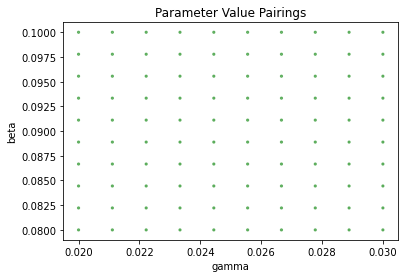

In [11]:
# Plot "true/false" points.  Is there any way of characterizing these regions?

sir_model.plot_two_params("gamma", "beta", param_choices_true_false)